In [4]:
import cv2
import filters
from managers import WindowManager,CaptureManager

In [10]:
class Cameo(object):
    
    def __init__(self):
        self._windowManager = WindowManager("Cameo",self.onKeypress)
        self._captureManager =CaptureManager(cv2.VideoCapture(0),self._windowManager,True)
        self._curveFilter =filters.SharpenFilter(kernel)
    def run(self):
        """Run the main loop"""
        self._windowManager.createWindow()
        while self._windowManager.isWindowCreated:
            self._captureManager.enterFrame()
            frame =self._captureManager.frame
            
            # TODO : Filter the frame (Chapter 3).
            
            self._captureManager.exitFrame()
            self._windowManager.processEvents()
            
    def onKeypress(self,keycode):
        """ Handle a keypress
        
        space -> Take a screenshot
        tab -> start /stop recording screencast
        escape -> Quit
        
        """
        if keycode == 32:
            self._captureManager.writeImage("dion3.png")
        elif keycode == 9:
            if not self._captureManager.isWritingVideo:
                self._captureManager.startWritingVideo("video1.avi")
            else:
                self._captureManager.stopWritingVideo()
        elif keycode == 27:
            self._windowManager.destroyWindow()

            
if __name__ =="__main__":
    Cameo().run()
            
        
        

NameError: name 'kernel' is not defined

In [1]:
import cv2
import numpy as np

def createMedianMask(disparityMap, validDepthMask, rect=None):
    """Return a mask selecting the median layer, plus shadows."""
    if rect is not None:
        x, y, w, h = rect
        disparityMap = disparityMap[y:y+h, x:x+w]
        validDepthMask = validDepthMask[y:y+h, x:x+w]
    
    median = np.median(disparityMap)
    
    return np.where((validDepthMask == 0) | (np.abs(disparityMap - median) < 12), 1.0, 0.0)

# Simulasi data
disparityMap = np.array([[10, 20, 5],
                         [15, 30, 5],
                         [8, 12, 6]])

validDepthMask = np.array([[1, 0, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

# Membuat masker dengan memanggil fungsi createMedianMask
mask = createMedianMask(disparityMap, validDepthMask)

# Menampilkan hasil masker
print("Mask:")
print(mask)


Mask:
[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]


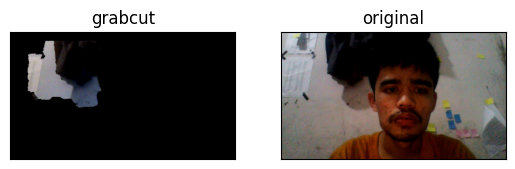

In [13]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
img = cv2.imread('Dion.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (100,50,421,378)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.subplot(121), plt.imshow(img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(cv2.imread('dion.jpg'),cv2.COLOR_BGR2RGB))
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.show()

# Bab 5 :Detecting and Recognizing Face

## Conceptualizing Haar cascades
- Haar-like features dan Haar cascades adalah dua konsep penting dalam deteksi wajah dan objek menggunakan metode Viola-Jones, sebuah teknik populer dalam bidang pengenalan wajah dan objek di dalam visi komputer. Berikut penjelasan singkat mengenai keduanya:

  - Haar-like Features:
        Haar-like features adalah sekumpulan filter sederhana berbentuk kotak yang digunakan untuk mengidentifikasi pola visual dalam citra.
        Mereka bekerja dengan mengukur perbedaan intensitas piksel di bawah area putih dan area hitam filter. Ini memungkinkan mereka untuk menangkap           informasi seperti tepi, garis horizontal, dan vertikal, serta pola-pola sederhana dalam citra.
        Contohnya, mata manusia cenderung memiliki perbedaan intensitas yang karakteristik. Haar-like features dapat digunakan untuk mendeteksi pola            ini dalam gambar.

   - Haar Cascades:
        Haar cascades adalah sekumpulan klasifikasi Haar-like features yang digunakan untuk mendeteksi objek atau wajah dalam gambar.
        Mereka bekerja secara hierarkis, dengan beberapa tingkat deteksi yang semakin kompleks. Misalnya, level pertama mungkin hanya mendeteksi fitur          sederhana seperti tepi, sementara level selanjutnya menggabungkan fitur-fitur ini untuk mendeteksi pola yang lebih kompleks seperti mata atau           hidung.
        Algoritma Viola-Jones menggunakan pembelajaran mesin untuk melatih cascades ini menggunakan sejumlah besar gambar positif (yang berisi objek            yang ingin dideteksi) dan gambar negatif (yang tidak berisi objek tersebut).
        Haar cascades sangat efisien, sehingga cocok untuk deteksi wajah atau objek secara real-time pada perangkat dengan sumber daya terbatas.

Dalam konteks face tracking, Haar-like features dan cascades digunakan untuk mendeteksi wajah dalam setiap frame dari aliran video atau serangkaian gambar. Dengan mendeteksi wajah, kita dapat melacaknya saat bergerak di dalam video, memungkinkan aplikasi seperti kamera keamanan, pengenalan wajah, dan permainan berbasis gerak.

Haar cascades telah menjadi salah satu teknik paling populer dalam visi komputer untuk tugas-tugas deteksi wajah dan objek, dan mereka telah digunakan secara luas dalam berbagai aplikasi.
- features atau disebut dengan abstracting image adalah mengubah atau mereduksi representasi gambar wajah menjadi representasi yang lebih sederhana, tetapi masih mempertahankan informasi yang penting atau fitur-fitur kunci yang diperlukan untuk tujuan deteksi dan pengenalan wajah

## Getting Haar cascade data

ada beberapa haar cascade data yang bisa digunakan untuk deteksi wajah

- haarcascade_profileface.xml
- haarcascade_rigteye_2splits.xml
- haarcascade_russian_plate_number.xml
- haarcascade_smile.xml
- haarcascade_upperbody.xml

# Performing face detection on a still image

In [3]:
import cv2
filename = 'Dion.jpg'
def detect(filename):
    face_cascade =cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(120,0,0),2)
    cv2.namedWindow('Vikings Detected!!')
    cv2.imshow('Vikings Detected!!', img)
    cv2.imwrite('./vikings.jpg', img)
    cv2.waitKey(0)
detect(filename)

# Performing face detection on a video

In [4]:
import cv2
def detect():
    face_cascade =cv2.CascadeClassifier ("haarcascade_frontalface_default.xml")
    eye_cascade =cv2.CascadeClassifier ("haarcascade_smile.xml")
    camera =cv2.VideoCapture(0)

    while True:
        ret,frame =camera.read()
        gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            img = cv2.rectangle(frame,(x,y),(x+w+15,y+h+15),(120,0,0),2)
            roi_gray =gray[y:y+h,x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray,1.03,5,0,(50,50))
            for (ex,ey,ew,eh) in eyes:
                img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,120,0),5)
        cv2.imshow("camera",frame)
        if cv2.waitKey(int(1000/12)) & 0xff ==ord("q"):
            break
    camera.release()
    cv2.destroyAllWindows()
if __name__ =="__main__":
    detect()
            
        

# Performing face recognition

# Generating the data for face recognition

- Images will be grayscale in the .pgm format
- square shape
- All the same size images (I used 200 x 200; Most freely available sets are smaller than that)

Here's the scripts itself



In [5]:
import cv2

def generate():
    face_cascade =cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    eye_cascade =cv2.CascadeClassifier("haarcascade_eye.xml")
    camera =cv2.VideoCapture(0)
    count =0
    while True:
        ret,frame =camera.read()
        gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        face = face_cascade.detectMultiScale(gray,1.3,5)

        for (x,y,w,h) in face:
            img =cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            f =cv2.resize(gray[y:y+h,x:x+h],(200,200))
            cv2.imwrite("%s.pgm" % str(count),f)
            count += 1

        cv2.imshow("camera",frame)
        if cv2.waitKey(int(1000/12)) & 0xff == ord("q"):
            break
    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    generate()

beyond,nitty-gritty,invented
containing
numerous
whether
confidence
certain
contain
generated
previous
therefore

In [17]:
import os

def read_image(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

                    # Resize to given size (if given)
                    if sz is not None:
                        im = cv2.resize(im, (200, 200))
                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)
                except (IOError, OSError) as e:
                    errno, strerror = e.args
                    print("I/O error ({0}): {1}".format(errno, strerror))
                except Exception as e:
                    print("Unexpected error:", e)
                    raise
            c = c + 1
    return (X, y)

read_image("D:\openCV\gambar")


([], [])

In [ ]:
def face_rec():
    names =["dion","jane","jack"]
    if len(sys.argv) < 2:
        print("USAGE : facerec_demo.py </path/to/images>
              [</path/to/store/images/at>]"
        sys.exit()
    [X,y] = read_images(sys.argv(1)[1])
    y =np.asarray(y,dtype= np.int32)

    if len(sys.argv) ==3:
        out_dir =sys.argv[2]

    model =cv2.face.createEigenFaceRecognizer()
    model.train(np.asarray(X),np.asarray(7))
    camera =cv2.VideoCapture(0)
    face_cascade =cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    while True:
        ret,image =camera.read()
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            img =cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
            gray =cv.cvtColor(img,cv2.COLOR_BGR2GRAY)
            roi =gray[x:x+w,y:y+h]
            try

## Bab 6: Retrieving Images and searching Using Image descriptions

### feature detection algorithms

- Harris : deteksi sudut
- sift =deteksi 

### mengubah BGR2GRAY bertujuan agar perubahan intensitas dalam gambar itu lebih kelihatan 
cv2.cornerHarris(gray,blockSize,ksize,k)

- blockSize =Parameter ini mengontrol ukuran blok yang digunakan dalam perhitungan. Fungsi akan memindai setiap piksel dan menghitung responsnya terhadap sudut dalam blok ini. Block size adalah ukuran kotak yang digunakan untuk mengukur perubahan intensitas di sekitar setiap piksel. Semakin besar blockSize, semakin halus hasilnya, tetapi juga semakin tidak sensitif terhadap sudut yang lebih kecil. Umumnya, nilai 2 adalah pilihan yang baik untuk kebanyakan aplikasi.
- ksize =Ini adalah ukuran kernel Sobel yang digunakan untuk menghitung gradien citra. Gradien digunakan untuk mengukur perubahan intensitas di sekitar setiap piksel. Nilai ksize harus berupa bilangan ganjil positif. Ukuran kernel Sobel yang umum digunakan adalah 3, 5, atau 7.
-  Parameter ini adalah konstanta dalam persamaan Harris. Nilai yang lebih tinggi akan membuat algoritma lebih sensitif terhadap sudut yang lebih tajam. Biasanya, nilai 0,04 adalah pilihan yang baik

Hasil dari fungsi cv2.cornerHarris() adalah citra respons sudut. Pada citra respons sudut, nilai yang tinggi menunjukkan bahwa titik tersebut adalah sudut, sementara nilai yang rendah menunjukkan bahwa titik tersebut bukan sudut.


In [17]:
import cv2
import numpy as np

img =cv2.imread("vikings.jpg")
img =cv2.resize(img,(400,200))
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray =np.float32(gray)
dst =cv2.cornerHarris(gray,5,23,0.04)
img[dst>0.01 * dst.max()] =[0,0,255]
while True:
    
    cv2.imshow("corners",img)
    if cv2.waitKey(int(1000/12)) & 0xff ==ord("q"):
        break
cv2.destroyAllWindows()

In [19]:
cap =cv2.VideoCapture(0)

while True:
    get,frame =cap.read()
    gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray =np.float32(gray)
    dst =cv2.cornerHarris(gray,10,23,0.04)
    frame[dst>0.01 * dst.max()] =[0,0,255]
    cv2.imshow("dion",frame)
    if cv2.waitKey(int(1000/12)) & 0xff ==ord("q"):
        break
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

imgpath = "vikings.jpg"
img = cv2.imread(imgpath)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()  # Gunakan cv2.SIFT_create() tanpa 'xfeatures2d'
keypoints, descriptor = sift.detectAndCompute(gray, None)

img_with_keypoints = cv2.drawKeypoints(
    image=img,
    keypoints=keypoints,
    outImage=None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(51, 163, 236)
)

# Tampilkan gambar yang sudah ditandai dengan keypoints
cv2.imshow("Image with Keypoints", img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [34]:
cap =cv2.VideoCapture(0)

while True:
    ret,frame =cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()  # Gunakan cv2.SIFT_create() tanpa 'xfeatures2d'
    keypoints, descriptor = sift.detectAndCompute(gray, None)

    img_with_keypoints = cv2.drawKeypoints(
    image=frame,
    keypoints=keypoints,
    outImage=None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(51, 163, 236))
    cv2.imshow("Image with Keypoints", img_with_keypoints)
    if cv2.waitKey(int(1000/12)) ==ord("q"):
        break 
cv2.waitKey(0)
cv2.destroyAllWindows()

## Feature extraction and detection using Fast Hessian and SURF

In [24]:
import cv2
import sys 
import numpy as np

imgpath = cv2.imread("Dion.jpg")
alg = sys.argv[1]  # Mengubah menjadi argumen pertama (indeks 0) karena sys.argv[0] adalah nama skrip itu sendiri

def fd(algorithm):
    if algorithm == "SIFT":
        return cv2.SIFT_create()
    if algorithm == "SURF":
        return cv2.SURF_create(float(sys.argv[2]) if len(sys.argv) == 3 else 4000)  # Mengambil argumen ketiga jika ada, jika tidak, gunakan nilai default 4000

gray = cv2.cvtColor(imgpath, cv2.COLOR_BGR2GRAY)
fd_alg = fd(alg)
keypoints, descriptor = fd_alg.detectAndCompute(gray, None)

img = cv2.drawKeypoints(image=imgpath, outImage=imgpath, keypoints=keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(51, 163, 236))  # Menggunakan imgpath sebagai gambar masukan dan keluaran

cv2.imshow("keypoints", imgpath)
while True:
    if cv2.waitKey(int(1000/12)) & 0xFF == ord("q"):  # Mengubah cara mengecek tombol yang ditekan dan menambahkan bitwise AND untuk memastikan kompatibilitas dengan Python 3
        break
    
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'detectAndCompute'

## ORB feature detection 

- ORB detection adalah salah satu cara deteksi pada suatu gambar , orb memiliki kelebihan dari metode metode detection lainnya diantaranya     Cepat dan efisien dalam mendeteksi fitur kunci pada gambar.
    Mampu mengatasi perubahan rotasi dalam citra.
    Menggunakan deskriptor BRIEF yang relatif ringan, sehingga cocok untuk aplikasi real-time.
- lalu apa yang dideteksi ?? yang dideteksi salah satunya adalah keypoint , keypoints adalah hal yang menonjol dari sebuah foto diantaranya : Tepi,sudut,titik titik pada tekstur unit, bintik-bintik terang dan tepi dalam objek

- keypoints adalah daftar objek yang mewakili posisi titik kunci di citra, sedangkan descriptors adalah daftar objek yang berisi deskriptor yang menggambarkan setiap titik kunci.
- cv2.drawKeypoints digunakan untuk menggambar titik-titik kunci pada citra.
- Parameter flags digunakan untuk mengatur bagaimana citra titik kunci akan digambar, dan dalam kasus ini, kita menggunakan cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS untuk menggambar dengan informasi yang lebih banyak.
  
- None: Ini adalah mask yang dapat digunakan untuk menentukan area di mana titik-titik kunci harus ditemukan. Dalam contoh Anda, tidak ada mask yang digunakan, sehingga kita menggunakan None, jadi seluruh gambar akan dicari mask nya atau titik keypoinsnya

In [25]:
import cv2

# Load gambar
img = cv2.imread('vikings.jpg', cv2.IMREAD_COLOR)

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Buat objek detektor ORB
orb = cv2.ORB_create()

# Temukan keypoints dan deskriptornya
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Gambar hasilnya dengan keypoints
img_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Tampilkan gambar dengan keypoints
cv2.imshow('ORB Keypoints', img_keypoints)

# Tunggu hingga tombol 'q' ditekan, lalu tutup jendela
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


### feature matching with ORB

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

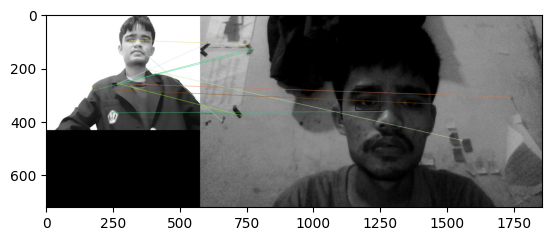

(<matplotlib.image.AxesImage at 0x13cc13df5b0>, None)

In [116]:
img1 =cv2.imread("foto.jpg",cv2.IMREAD_GRAYSCALE)
img2 =cv2.imread("vikings.jpg",cv2.IMREAD_GRAYSCALE)

orb =cv2.ORB_create()

kp1,des1 =orb.detectAndCompute(img1,None)
kp2,des2 =orb.detectAndCompute(img2,None)

bf =cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)
matches =bf.match(des1,des2)
matches =sorted(matches,key =lambda x:x.distance)
img3 =cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],img2,flags =2)
plt.imshow(img3),plt.show()

## Fast detection

- akan menggambar lingkaran disekitar gambar  yang menampung 16 pixels


In [26]:
import cv2

# Baca citra
image = cv2.imread('foto.jpg', cv2.IMREAD_GRAYSCALE)

# Buat objek FAST
fast = cv2.FastFeatureDetector_create()

# Temukan titik-titik kunci
keypoints = fast.detect(image, None)

# Gambari titik-titik kunci pada citra
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Tampilkan citra dengan titik-titik kunci
cv2.imshow('FAST Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Brief

- Brief bukanlah pendeteksi seperti yang lainnya tetapi ia descriptor yang akan menggunakan algoritma pendeteksi lainnya 
seperti fast

In [27]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('simple.jpg', cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

32


AttributeError: 'NoneType' object has no attribute 'shape'

In [14]:
import cv2
import numpy as np

# Baca gambar
image = cv2.imread('foto.jpg', cv2.IMREAD_GRAYSCALE)

# Buat objek detektor ORB
orb = cv2.ORB_create()

# Temukan keypoints dan deskriptor ORB
keypoints, descriptors = orb.detectAndCompute(image, None)

# Buat objek detektor BRIEF
brief = cv2.BRISK_create()

# Hitung deskriptor BRIEF
keypoints, descriptors = brief.compute(image, keypoints)

# Tampilkan deskriptor
print(descriptors)


[[244 255 239 ... 199 131 231]
 [254  11  81 ...   0   0 192]
 [254 143 243 ... 112 118 212]
 ...
 [235 255 255 ...   0 145  18]
 [252 153 243 ...   0   0 160]
 [235 255 255 ...   8 153  18]]


## Using K-Nearest Neighbors matching

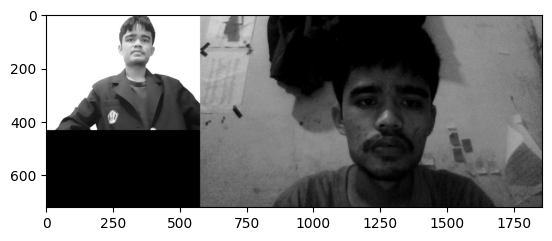

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load dua gambar yang akan dibandingkan
img1 = cv2.imread('foto.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Dion.jpg', cv2.IMREAD_GRAYSCALE)

# Inisialisasi detektor ORB
orb = cv2.ORB_create()

# Temukan keypoint dan deskriptor untuk kedua gambar
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Gunakan Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Temukan kecocokan terbaik dengan menggunakan knnMatch
matches = bf.knnMatch(des1, des2, k=1)

# Membuat daftar kecocokan yang memenuhi aturan
good_matches = []
for match in matches:
    if len(match) < 2:
        continue
    m, n = match
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

# Gambar kecocokan pada gambar
img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Tampilkan hasil
plt.imshow(img_matches)
plt.show()


## FLANN-based matching

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

querryImage =cv2.imread("vikings.jpg",0)
trainingImage =cv2.imread("foto.jpg",0)

# create SIFT and detect /compute
sift =cv2.xfeatures2d.SIFT_create()
kp1,des1 =sift.detectAndCompute(querryImage,None)
kp2,des2 =sift.detectAndCompute(trainingImage,None)

# FLANN matcher parameters
FLANN_INDEX_KDTREE = 0
indexParams =dic(algorithm =FLANN_INDEX_KDTREE,trees = 5)
searchParams =dict(checks =50)
flann =cv2.FlannBaseMatcher(indexParams,searchParams)
matches =flann.knnMatch(des1,des2,k =2)

# prepare a empty mask to draw good matches
matchesMask =[[0,0] for i in xrange(len(matches))]
# David G. Lowe's ratio test, populate the mask
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
drawParams = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)
resultImage = cv2.drawMatchesKnn(queryImage,kp1,trainingImage,kp2,matches,
 None,**drawParams)
plt.imshow(resultImage,), plt.show()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

## FLANN matching with homography

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('foto.jpg',0)
img2 = cv2.imread('images/color2_small.jpg',0)
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good 
     ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good 
     ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] 
     ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, 
     cv2.LINE_AA)
else:
    print "Not enough matches are found - %d/%d" % 
    (len(good),MIN_MATCH_COUNT)
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green 
color
 singlePointColor = None,matchesMask = matchesMask, # draw only inliers
 flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3995909089.py, line 38)

In [16]:
## Saving image descriptors to file

# generate_descriptors.py
import cv2
import numpy as np
from os import walk
from os.path import join
import sys
def create_descriptors(folder):
    files = []
    for (dirpath, dirnames, filenames) in walk(folder):
        files.extend(filenames)
    for f in files:
        save_descriptor(folder, f, cv2.xfeatures2d.SIFT_create())
def save_descriptor(folder, image_path, feature_detector):
    img = cv2.imread(join(folder, image_path), 0)
    keypoints, descriptors = feature_detector.detectAndCompute(img, 
 None)
    descriptor_file = image_path.replace("jpg", "npy")
    np.save(join(folder, descriptor_file), descriptors)
dir = sys.argv[1]
create_descriptors(dir)

## Scanning for matches

In [ ]:
from os.path import join
from os import walk
import numpy as np
import cv2
from sys import argv
# create an array of filenames
folder = argv[1]
query = cv2.imread(join(folder, "tattoo_seed.jpg"), 0)
# create files, images, descriptors globals
files = []
images = []
descriptors = []
for (dirpath, dirnames, filenames) in walk(folder):
    files.extend(filenames)
    for f in files:
        if f.endswith("npy") and f != "tattoo_seed.npy":
            descriptors.append(f)
    print descriptors
# create the sift detector
sift = cv2.xfeatures2d.SIFT_create()
query_kp, query_ds = sift.detectAndCompute(query, None)
# create FLANN matcher
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
# minimum number of matches
MIN_MATCH_COUNT = 10
potential_culprits = {}
print ">> Initiating picture scan..."
for d in descriptors:
    print "--------- analyzing %s for matches ------------" % d
    matches = flann.knnMatch(query_ds, np.load(join(folder, d)), k =2)
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    if len(good) > MIN_MATCH_COUNT:
        print "%s is a match! (%d)" % (d, len(good))
else:
    print "%s is not a match" % d
    potential_culprits[d] = len(good)

max_matches = None
potential_suspect = None
for culprit, matches in potential_culprits.iteritems():
    if max_matches == None or matches > max_matches:
        max_matches = matches
        potential_suspect = culprit
print "potential suspect is %s" % potential_suspect.replace("npy", 
 "").upper()

In [52]:
from cvzone.HandTrackingModule import HandDetector

ModuleNotFoundError: No module named 'cvzone'

## BAB 7 : Detecting and Recognizing object

People detection

In [21]:
import cv2
import numpy as np

def is_inside(o,i):
    ox,oy,ow,oh =o
    ix,iy,iw,ih =i
    return ox>ix and oy > iy and ox+ow<ix+iw and oy +oh < iy+ih

def draw_person(image,person):
    x,y,w,h =person
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    img =cv2.imread("Dion.jpg")
    hog =cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    found,w =hog.detectMultiScale(img)

    found_filtered =[]
    for ri,r in enumerate(found):
        for qi,q in enumerate(found):
            if ri != qi and is_inside(r,q):
                break
        else:
            found_filtered.append(r)
    for person in found_filtered:
        draw_person(img,person)
cv2.imshow("people detection",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [15]:
import cv2
import numpy as np

# Baca gambar grayscale
img = cv2.imread('Dion.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan thresholding dengan nilai ambang 127
ret, threshold_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Tampilkan gambar asli dan hasil thresholding
cv2.imshow('Original Image', img)
cv2.imshow('Thresholded Image', threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
import cv2
import numpy as np

# Baca gambar sebagai gambar grayscale
img = cv2.imread('Dion.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan thresholding dengan nilai ambang 127
ret, threshold_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Temukan kontur dalam gambar threshold
contours, hierarchy = cv2.findContours(threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
contour_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Tampilkan gambar asli dan gambar dengan kontur
cv2.imshow('Original Image', img)
cv2.imshow('Contour Image', contour_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Bab 7 Detecting and Recognizing Objects

In [1]:
import cv2
import numpy as np

def is_inside(o,i):
    ox,oy,ow,oh =o
    ix,iy,iw,ih =i
    return ox>ix and oy>iy and ox+ow<ix+iw and oy +oh<iy+ih
def draw_person(image,person):
    x,y,w,h =person
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

img =cv2.imread("jalan1.jpg")
hog =cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

found,w =hog.detectMultiScale(img)
found_filtered =[]
for ri,r in enumerate(found):
    for qi,q in enumerate(found):
        if ri != qi and is_inside(r,q):
            break
    else:
        found_filtered.append(r)
for person in found_filtered:
    draw_person(img,person)

cv2.imshow('Contour Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
